# Installation

---



Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Kuliah S1/Tugas Akhir/Projek

Mounted at /content/drive/
/content/drive/MyDrive/Kuliah S1/Tugas Akhir/Projek


Installer

In [ ]:
#Install Sastrawi for Stemming
!pip install sastrawi

#Install scikit-learn Extra
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 


# Import Package

In [ ]:
#General Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Library For Text Processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

#Library For Stemming (Sastrawi)
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#Library For TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Library For Reduksi Dimensi
from sklearn.decomposition import PCA

#Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Library for Modelling
from sklearn_extra.cluster import KMedoids

#Library for Evaluation
from sklearn.metrics import silhouette_score,silhouette_samples

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Preparation

## **Load Data**

In [ ]:
quran = pd.read_csv('quran-db-indonesia.csv',index_col='id', header=1, usecols=['id','sura','aya','translation'])
quran.head(7)

,sura,aya,translation
id,,,
1,1,1,"Dengan nama Allah Yang Maha Pengasih, Maha Pen..."
2,1,2,"Segala puji bagi Allah, Tuhan seluruh alam,"
3,1,3,"Yang Maha Pengasih, Maha Penyayang,"
4,1,4,Pemilik hari pembalasan.1)
5,1,5,Hanya kepada Engkaulah kami menyembah dan hany...
6,1,6,"Tunjukilah kami jalan yang lurus,2)"
7,1,7,(yaitu) jalan orang-orang yang telah Engkau be...


## **Cleaning Data**

---


Remove integer from data translation

In [ ]:
quran['translation'] = quran['translation'].str.replace(r'[^A-Za-z0-9 ]+', '').str.replace(r'[0-9999]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
quran.head(7)

,sura,aya,translation
id,,,
1,1,1,Dengan nama Allah Yang Maha Pengasih Maha Peny...
2,1,2,Segala puji bagi Allah Tuhan seluruh alam
3,1,3,Yang Maha Pengasih Maha Penyayang
4,1,4,Pemilik hari pembalasan
5,1,5,Hanya kepada Engkaulah kami menyembah dan hany...
6,1,6,Tunjukilah kami jalan yang lurus
7,1,7,yaitu jalan orangorang yang telah Engkau beri ...


## **Case Folding**

In [ ]:
def case_folding(lwr):
  lwr = lwr.lower()
  return lwr

quran_prep = quran.loc[:,['translation']]
quran_prep['translation'] = quran_prep['translation'].apply(case_folding)

In [ ]:
quran_prep.head(7)

,translation
id,
1,dengan nama allah yang maha pengasih maha peny...
2,segala puji bagi allah tuhan seluruh alam
3,yang maha pengasih maha penyayang
4,pemilik hari pembalasan
5,hanya kepada engkaulah kami menyembah dan hany...
6,tunjukilah kami jalan yang lurus
7,yaitu jalan orangorang yang telah engkau beri ...


## **Tokenizing**

In [ ]:
quran_prep['translation'] = quran_prep.apply(lambda row: nltk.word_tokenize(row['translation']),axis=1)

In [ ]:
quran_prep.head(7)

,translation
id,
1,"[dengan, nama, allah, yang, maha, pengasih, ma..."
2,"[segala, puji, bagi, allah, tuhan, seluruh, alam]"
3,"[yang, maha, pengasih, maha, penyayang]"
4,"[pemilik, hari, pembalasan]"
5,"[hanya, kepada, engkaulah, kami, menyembah, da..."
6,"[tunjukilah, kami, jalan, yang, lurus]"
7,"[yaitu, jalan, orangorang, yang, telah, engkau..."


## **Stopwords**

In [ ]:
#Get stopwords
list_stopwords = stopwords.words('indonesian')
print(len(list_stopwords))
print(list_stopwords)

758
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeingi

In [ ]:
def stopwords_removal(words):
  #Check word in DF with list stopwords
  return [word for word in words if word not in list_stopwords]

quran_prep['translation'] = quran_prep['translation'].apply(stopwords_removal)

In [ ]:
quran_prep

,translation
id,
1,"[nama, allah, maha, pengasih, maha, penyayang]"
2,"[puji, allah, tuhan, alam]"
3,"[maha, pengasih, maha, penyayang]"
4,"[pemilik, pembalasan]"
5,"[engkaulah, menyembah, engkaulah, mohon, perto..."
...,...
6232,"[raja, manusia]"
6233,"[sembahan, manusia]"
6234,"[kejahatan, bisikan, setan, bersembunyi]"


## **Stemming**

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(sentence) :
  output = []
  for word in sentence :
    stemming_word = stemmer.stem(word)
    output.append(stemming_word)
  return output

quran_prep['translation'] = quran_prep['translation'].apply(stemming)

In [ ]:
quran_prep

,translation
id,
1,"[nama, allah, maha, asih, maha, sayang]"
2,"[puji, allah, tuhan, alam]"
3,"[maha, asih, maha, sayang]"
4,"[milik, balas]"
5,"[engkau, sembah, engkau, mohon, tolong]"
...,...
6232,"[raja, manusia]"
6233,"[sembah, manusia]"
6234,"[jahat, bisik, setan, sembunyi]"


# Pembobotan TF-IDF

## Dataframe initiation

In [ ]:
#Buat DF baru supaya data lebih aman
quran_df = quran_prep.loc[:,['translation']]
quran_df

,translation
id,
1,"[nama, allah, maha, asih, maha, sayang]"
2,"[puji, allah, tuhan, alam]"
3,"[maha, asih, maha, sayang]"
4,"[milik, balas]"
5,"[engkau, sembah, engkau, mohon, tolong]"
...,...
6232,"[raja, manusia]"
6233,"[sembah, manusia]"
6234,"[jahat, bisik, setan, sembunyi]"


In [ ]:
#Ubah List dalam data menjadi String
def to_str(words) :
  sentence = ' '.join([word for word in words])
  return sentence

quran_df['translation'] = quran_df['translation'].apply(to_str)
quran_df.head(7)

,translation
id,
1,nama allah maha asih maha sayang
2,puji allah tuhan alam
3,maha asih maha sayang
4,milik balas
5,engkau sembah engkau mohon tolong
6,tunjuk jalan lurus
7,jalan orangorang engkau nikmat jalan murka jal...


## TF-IDF Calculation

In [ ]:
vectorizer = TfidfVectorizer(norm='l1', smooth_idf=False)
tf_idf = vectorizer.fit_transform(quran_df['translation'])
tf_idf_array = tf_idf.toarray()

print(tf_idf_array)
print(tf_idf_array.shape)

#Print all tf-idf based on id
quran_tf_idf = pd.DataFrame(tf_idf_array,columns=vectorizer.get_feature_names_out())
quran_tf_idf

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(6236, 2899)


,abadi,abai,abdi,abdullah,absen,abu,acau,acuh,ad,ada,...,zarah,zarahbaik,zarrah,zihar,zikir,zina,zubur,zuhur,zulkarnain,zulkifli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Example of tf-idf
quran_tf_idf.loc[:,['maha','asih','sayang']]

,maha,asih,sayang
0,0.286477,0.222232,0.191626
1,0.000000,0.000000,0.000000
2,0.409057,0.317322,0.273620
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
6231,0.000000,0.000000,0.000000
6232,0.000000,0.000000,0.000000
6233,0.000000,0.000000,0.000000
6234,0.000000,0.000000,0.000000


# Reduksi Dimensi


---
Tahapan ini mereduksi dimensi menjadi *n* dimensi/kolom


In [ ]:
list_reduction = [2,1000,2899]
result_reduction = []
for i in list_reduction :
  pca = PCA(n_components=i,random_state=0)
  quran_pca = pca.fit_transform(quran_tf_idf)
  result_reduction.append(quran_pca)

# Modelling

---

K-Medoids Algorithm

In [ ]:
n_klaster = [7,15,21]
for i in n_klaster :
  for j in range(3) :
    cluster = KMedoids(n_clusters=i,random_state=0, init='build').fit(result_reduction[j])
    quran[f'{i}_cluster_{j}'] = cluster.labels_

In [ ]:
quran = quran.rename(columns = {'7_cluster_0' : '7_cluster_2_dim','7_cluster_1' : '7_cluster_1000_dim','7_cluster_2' : '7_cluster_2899_dim',
                                '15_cluster_0' : '15_cluster_2_dim','15_cluster_1' : '15_cluster_1000_dim','15_cluster_2' : '15_cluster_2899_dim',
                                '21_cluster_0' : '21_cluster_2_dim','21_cluster_1' : '21_cluster_1000_dim','21_cluster_2' : '21_cluster_2899_dim'})

In [ ]:
quran.to_csv('Quran Dataset After Processed.csv')
quran

,sura,aya,translation,7_cluster_2_dim,7_cluster_1000_dim,7_cluster_2899_dim,15_cluster_2_dim,15_cluster_1000_dim,15_cluster_2899_dim,21_cluster_2_dim,21_cluster_1000_dim,21_cluster_2899_dim
id,,,,,,,,,,,,
1,1,1,Dengan nama Allah Yang Maha Pengasih Maha Peny...,4,0,0,4,0,0,15,0,0
2,1,2,Segala puji bagi Allah Tuhan seluruh alam,2,0,0,9,0,0,16,0,0
3,1,3,Yang Maha Pengasih Maha Penyayang,4,0,0,4,7,7,15,7,7
4,1,4,Pemilik hari pembalasan,0,0,0,10,11,11,10,11,11
5,1,5,Hanya kepada Engkaulah kami menyembah dan hany...,6,0,0,6,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6232,114,2,Raja manusia,6,0,0,6,0,0,6,0,0
6233,114,3,sembahan manusia,4,6,6,4,6,6,4,6,6
6234,114,4,dari kejahatan bisikan setan yang bersembunyi,0,0,0,0,0,0,17,0,0


# Modelling Visualization

### 2899 Dimensi

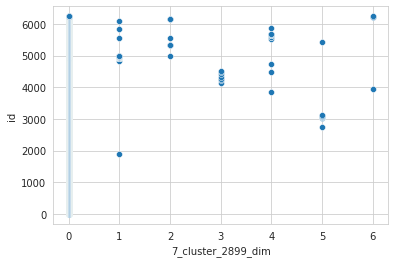

In [ ]:
sns.scatterplot(data = quran, x='7_cluster_2899_dim', y=quran.index)
sns.set_style("whitegrid")
plt.xticks(np.arange(7))
plt.savefig('7_cluster_2899_dim.png')
plt.show()

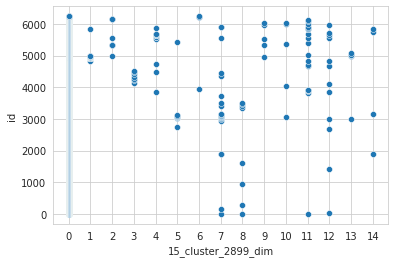

In [ ]:
sns.scatterplot(data = quran, x='15_cluster_2899_dim', y=quran.index)
plt.xticks(np.arange(15))
plt.savefig('15_cluster_2899_dim.png')
plt.show()

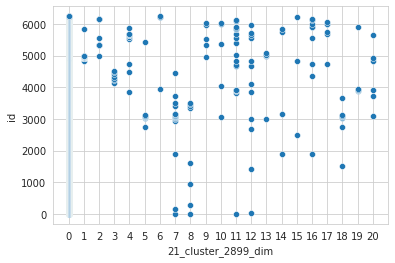

In [ ]:
sns.scatterplot(data = quran, x='21_cluster_2899_dim', y=quran.index)
plt.xticks(np.arange(21))
plt.savefig('21_cluster_2899_dim.png')
plt.show()

### 1000 Dimensi

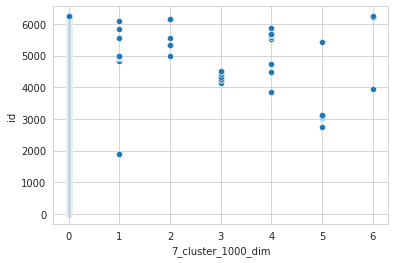

In [ ]:
sns.scatterplot(data = quran, x='7_cluster_1000_dim', y=quran.index)
plt.xticks(np.arange(7))
plt.savefig('7_cluster_1000_dim.png')
plt.show()

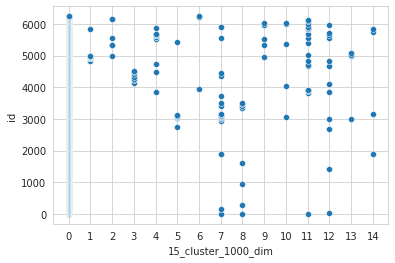

In [ ]:
sns.scatterplot(data = quran, x='15_cluster_1000_dim', y=quran.index)
plt.xticks(np.arange(15))
plt.savefig('15_cluster_1000_dim.png')
plt.show()

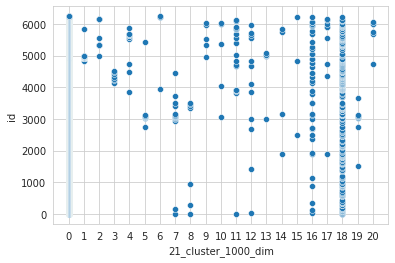

In [ ]:
sns.scatterplot(data = quran, x='21_cluster_1000_dim', y=quran.index)
plt.xticks(np.arange(21))
plt.savefig('21_cluster_1000_dim.png')
plt.show()

### 2 Dimensi

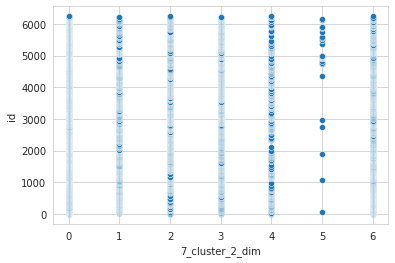

In [ ]:
sns.scatterplot(data = quran, x='7_cluster_2_dim', y=quran.index)
plt.xticks(np.arange(7))
plt.savefig('7_cluster_2_dim.png')
plt.show()

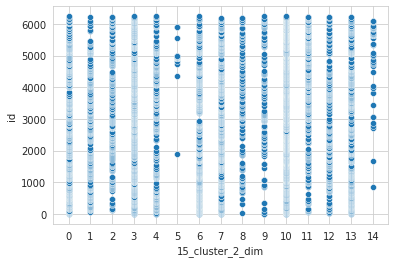

In [ ]:
sns.scatterplot(data = quran, x='15_cluster_2_dim', y=quran.index)
plt.xticks(np.arange(15))
plt.savefig('15_cluster_2_dim.png')
plt.show()

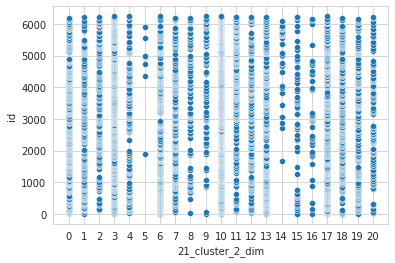

In [ ]:
sns.scatterplot(data = quran, x='21_cluster_2_dim', y=quran.index)
plt.xticks(np.arange(21))
plt.savefig('21_cluster_2_dim.png')
plt.show()

# Evaluasi


---

Evaluasi Menggunakan metode Silhouette Coefficient

In [ ]:
for i in range(3) :
  print(f'--- {list_reduction[i]} Dimensi ---')
  score_7 = silhouette_score(result_reduction[i],quran[f'7_cluster_{list_reduction[i]}_dim'])
  score_15 = silhouette_score(result_reduction[i],quran[f'15_cluster_{list_reduction[i]}_dim'])
  score_21 = silhouette_score(result_reduction[i],quran[f'21_cluster_{list_reduction[i]}_dim'])
  print(f'Nilai Silhouette Coefficient untuk 7 Cluster =  {score_7}\n'
        f'Nilai Silhouette Coefficient untuk 15 Cluster =  {score_15}\n'
        f'Nilai Silhouette Coefficient untuk 21 Cluster =  {score_21}\n')


--- 2 Dimensi ---
Nilai Silhouette Coefficient untuk 7 Cluster =  0.2971740418685257
Nilai Silhouette Coefficient untuk 15 Cluster =  0.2978949414295473
Nilai Silhouette Coefficient untuk 21 Cluster =  0.3392857806943992

--- 1000 Dimensi ---
Nilai Silhouette Coefficient untuk 7 Cluster =  0.14841065775657958
Nilai Silhouette Coefficient untuk 15 Cluster =  0.1487865906334991
Nilai Silhouette Coefficient untuk 21 Cluster =  0.07130145865208305

--- 2899 Dimensi ---
Nilai Silhouette Coefficient untuk 7 Cluster =  0.12331887771407252
Nilai Silhouette Coefficient untuk 15 Cluster =  0.12339449066758604
Nilai Silhouette Coefficient untuk 21 Cluster =  0.07526575929058278



# Result

In [ ]:
result_dict = {
    'dimensi' : [2,1000,2899],
    'cluster' : [7,15,21],
    'sc_7' : [0.29717,0.29789,0.33928],
    'sc_15' : [0.14841,0.14878,0.07130],
    'sc_21' : [0.12331,0.12339,0.07526]
}
df_result = pd.DataFrame.from_dict(result_dict)

In [ ]:
df_result = df_result.set_index('dimensi')
df_result

,cluster,sc_7,sc_15,sc_21
dimensi,,,,
2,7,0.29717,0.14841,0.12331
1000,15,0.29789,0.14878,0.12339
2899,21,0.33928,0.07130,0.07526


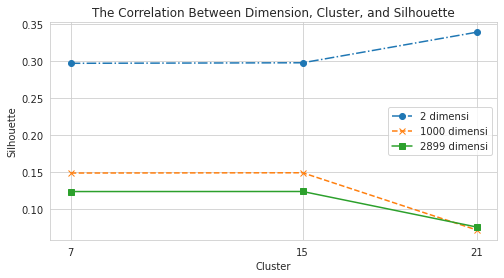

In [ ]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot()
ax.plot(df_result.cluster,df_result.sc_7, 'o-.')
ax.plot(df_result.cluster,df_result.sc_15, 'x--')
ax.plot(df_result.cluster,df_result.sc_21, 's-')
plt.xlabel('Cluster')
plt.ylabel('Silhouette')
plt.xticks([7,15,21])
plt.legend(['2 dimensi','1000 dimensi','2899 dimensi'])
plt.title('The Correlation Between Dimension, Cluster, and Silhouette')
plt.savefig('result.png')
plt.show()